# Online Retail Data Analysis

## Introduction
This project focuses on analyzing online retail data to extract insights about customer behavior, product performance, and sales trends. We will leverage data analytics and machine learning techniques to explore the dataset and uncover key patterns.


In [1]:
!source ~/Documents/projects/Retail_Analytics/.venv/bin/activate

In [2]:
import sys
print(sys.executable)

/home/jefferyp/Documents/projects/Retail_Exploratory_Data_Analysis/.venv/bin/python


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pyodbc
import json
import glob
import os
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

# Setting to make numbers easier to read on display
pd.options.display.float_format = '{:20.2f}'.format  #info: Format floats to show 2 decimal places for better readability

# Show all columns on output
pd.set_option('display.max_columns', 999)  #info: Display all columns in DataFrame outputs for visibility


# Data Exploration

In [4]:
# df = pd.read_csv("/home/jefferyp/Documents/projects/sales_2024-Q4.csv")
filepath = '/home/jefferyp/Documents/store_budget/sales/2024'
all_files = glob.glob(os.path.join(filepath, "*.csv"))

df = pd.concat((pd.read_csv(f) for f in all_files), ignore_index=True)

In [5]:
df = df.rename(columns={'Product variant SKU at time of sale':'SKU'})

In [6]:
df.head(5)

,Day,Product title,Product type,Product vendor,Order ID,Billing city,Billing region,Billing postal code,Customer ID,Staff member name,Sales channel,SKU,POS location name,Orders,Gross sales,Discounts,Returns,Net sales,Shipping charges,Duties,Additional fees,Taxes,Total sales,Quantity ordered,Gross margin,Gross profit,Gross returns,Net returns,Total returns,Total shipping charges,Cost of goods sold
0,2024-01-01,Echo | Touch Glove,Accessories,Echo,5201075830843.00,North Versailles,Pennsylvania,15137,6419200737339.00,NaN,Online Store,EG0290-026,NaN,1,49.00,0.00,0.00,49.00,0.00,0,0,0.00,49.00,1,0.62,30.40,0.00,0.00,0.00,0.00,18.60
1,2024-01-01,NaN,NaN,NaN,5201075830843.00,North Versailles,Pennsylvania,15137,6419200737339.00,NaN,Online Store,NaN,NaN,0,0.00,0.00,0.00,0.00,3.90,0,0,0.00,3.90,0,NaN,0.00,0.00,0.00,0.00,3.90,0.00
2,2024-01-02,Volatile | Flagstaff,Women's Footwear,Very Volatile,5196038799419.00,NaN,NaN,NaN,6414354186299.00,Billy Kid,Point of Sale,PV306TAU-10,"OGBG, Stanley",0,98.00,0.00,0.00,98.00,0.00,0,0,8.34,106.34,0,0.61,59.50,0.00,0.00,0.00,0.00,38.50
3,2024-01-02,Chez Gagné | I'm Sorry I Called You Old,Gifts,Chez Gange,5202637652027.00,NaN,NaN,NaN,0.00,Kristi Graning,Point of Sale,1407,"Goose & the Goat, Cherry Hills",1,6.00,0.00,0.00,6.00,0.00,0,0,0.44,6.44,1,0.50,3.00,0.00,0.00,0.00,0.00,3.00
4,2024-01-02,NaN,NaN,NaN,5202674810939.00,NaN,NaN,NaN,0.00,Danielle Patton,Point of Sale,NaN,"OGBG, Stanley",1,0.90,0.00,0.00,0.90,0.00,0,0,0.08,0.98,1,NaN,0.00,0.00,0.00,0.00,0.00,0.00


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8085 entries, 0 to 8084
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Day                     8085 non-null   object 
 1   Product title           7388 non-null   object 
 2   Product type            7374 non-null   object 
 3   Product vendor          7388 non-null   object 
 4   Order ID                8083 non-null   float64
 5   Billing city            334 non-null    object 
 6   Billing region          334 non-null    object 
 7   Billing postal code     334 non-null    object 
 8   Customer ID             8083 non-null   float64
 9   Staff member name       7754 non-null   object 
 10  Sales channel           8083 non-null   object 
 11  SKU                     7381 non-null   object 
 12  POS location name       7768 non-null   object 
 13  Orders                  8085 non-null   int64  
 14  Gross sales             8085 non-null   

In [8]:
df.describe()

,Order ID,Customer ID,Orders,Gross sales,Discounts,Returns,Net sales,Shipping charges,Duties,Additional fees,Taxes,Total sales,Quantity ordered,Gross margin,Gross profit,Gross returns,Net returns,Total returns,Total shipping charges,Cost of goods sold
count,8083.00,8083.00,8085.00,8085.00,8085.00,8085.00,8085.00,8085.00,8085.00,8085.00,8085.00,8085.00,8085.00,7335.00,8085.00,8085.00,8085.00,8085.00,8085.00,8085.00
mean,5405402569255.30,4344387933128.93,0.93,60.92,-8.72,-2.16,50.04,0.05,0.00,0.00,3.60,53.70,0.95,0.45,25.18,-2.31,-2.16,-2.31,0.05,24.61
std,135081817625.08,2582965760709.34,0.26,52.47,18.05,15.14,52.03,0.52,0.00,0.00,3.76,55.66,0.33,0.57,30.37,16.07,15.14,16.19,0.53,24.87
min,5130866622523.00,0.00,0.00,0.00,-202.80,-248.00,-248.00,-4.19,0.00,0.00,-17.98,-265.98,0.00,-42.61,-135.00,-248.00,-248.00,-265.98,-4.61,-113.00
25%,5269293170747.00,3092516700219.00,1.00,18.00,-9.33,0.00,14.95,0.00,0.00,0.00,1.04,16.03,1.00,0.44,3.00,0.00,0.00,0.00,0.00,6.80
50%,5386403283003.00,5597881008187.00,1.00,52.00,0.00,0.00,40.00,0.00,0.00,0.00,2.90,42.90,1.00,0.55,19.88,0.00,0.00,0.00,0.00,22.00
75%,5523647561787.00,6501654609979.00,1.00,88.00,0.00,0.00,78.00,0.00,0.00,0.00,5.66,83.66,1.00,0.59,43.00,0.00,0.00,0.00,0.00,38.00
max,5651991461947.00,7004557574203.00,1.00,378.00,0.00,149.75,378.00,15.28,0.00,0.00,26.25,378.00,7.00,0.97,228.10,149.75,149.75,149.75,15.28,149.90


# Data Cleaning

In [9]:
# check for missing values
missing_values = df.isnull().sum()
print("Missing values:\n", missing_values)

Missing values:
 Day                          0
Product title              697
Product type               711
Product vendor             697
Order ID                     2
Billing city              7751
Billing region            7751
Billing postal code       7751
Customer ID                  2
Staff member name          331
Sales channel                2
SKU                        704
POS location name          317
Orders                       0
Gross sales                  0
Discounts                    0
Returns                      0
Net sales                    0
Shipping charges             0
Duties                       0
Additional fees              0
Taxes                        0
Total sales                  0
Quantity ordered             0
Gross margin               750
Gross profit                 0
Gross returns                0
Net returns                  0
Total returns                0
Total shipping charges       0
Cost of goods sold           0
dtype: int64


In [10]:
# Description and Customer ID have huge number of null value

In [11]:
# drop rows with missing values (or use df.fillna(value) to fill)
# df = df.dropna()  # caution: this drops all rows with any missing value

In [12]:
# check for duplicates
duplicates = df.duplicated().sum()
print("Number of duplicate rows:", duplicates)

# remove duplicates
# df = df.drop_duplicates()

Number of duplicate rows: 0


In [13]:
# convert 'InvoiceDate' to datetime
df['Day'] = pd.to_datetime(df['Day'])

# Exploratory Analysis

In [14]:
# descriptive statistics
print(df.describe(include='all'))  # include='all' shows stats for categorical columns too

                                  Day                   Product title  \
count                            8085                            7388   
unique                            NaN                            1805   
top                               NaN  Leto | Lace Racerback Bralette   
freq                              NaN                             116   
mean    2024-06-21 06:33:26.382189312                             NaN   
min               2024-01-01 00:00:00                             NaN   
25%               2024-03-02 00:00:00                             NaN   
50%               2024-06-08 00:00:00                             NaN   
75%               2024-09-29 00:00:00                             NaN   
max               2024-12-31 00:00:00                             NaN   
std                               NaN                             NaN   

            Product type Product vendor             Order ID Billing city  \
count               7374           7388       

# Distribution of Quantities

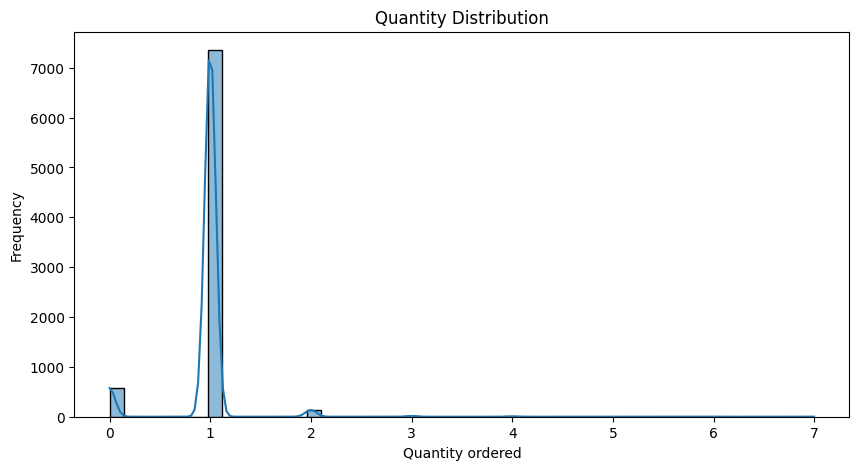

In [15]:
plt.figure(figsize=(10, 5))
sns.histplot(df['Quantity ordered'], bins=50, kde=True)
plt.title('Quantity Distribution')
plt.xlabel('Quantity ordered')
plt.ylabel('Frequency')
plt.show()

# Total Sales Over Time:

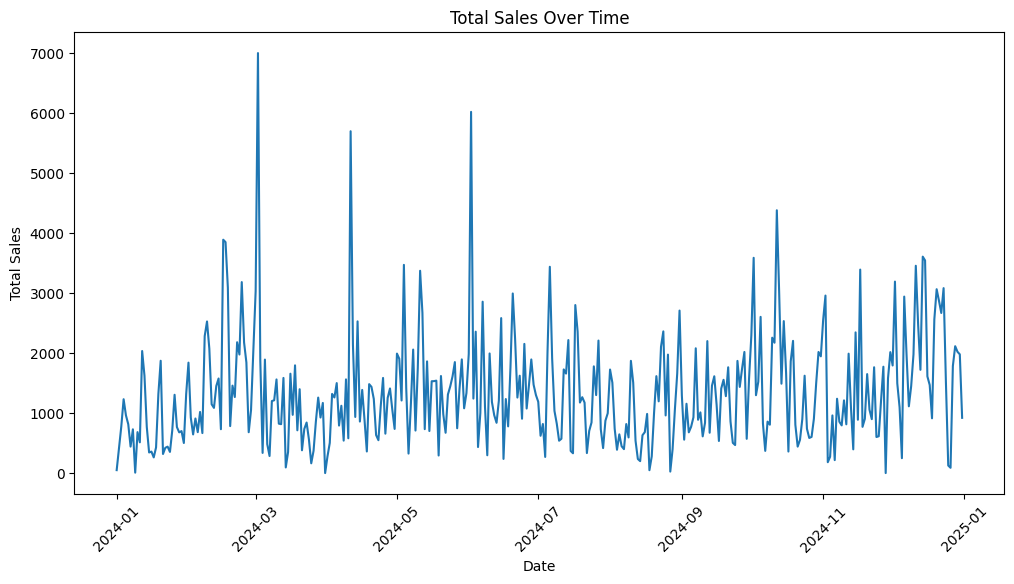

In [16]:
sales_over_time = df.groupby(df['Day'].dt.date)['Gross sales'].sum()
plt.figure(figsize=(12, 6))
sales_over_time.plot()
plt.title('Total Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()


# Sales By State 

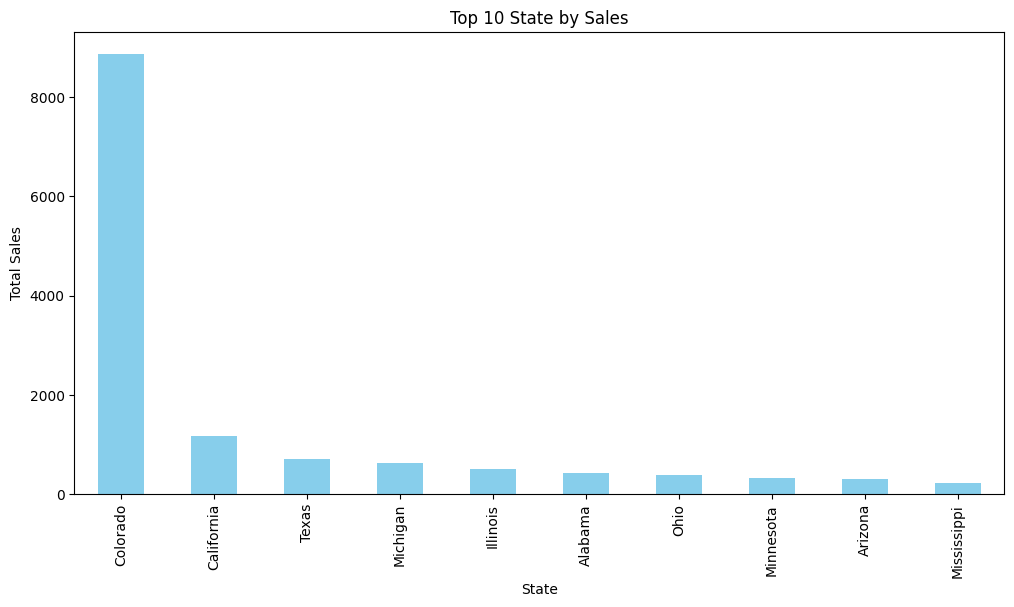

In [17]:
sales_by_country = df.groupby('Billing region')['Gross sales'].sum().sort_values(ascending=False)
plt.figure(figsize=(12, 6))
sales_by_country.head(10).plot(kind='bar', color='skyblue')
plt.title('Top 10 State by Sales')
plt.xlabel('State')
plt.ylabel('Total Sales')
plt.show()

# Sales by City

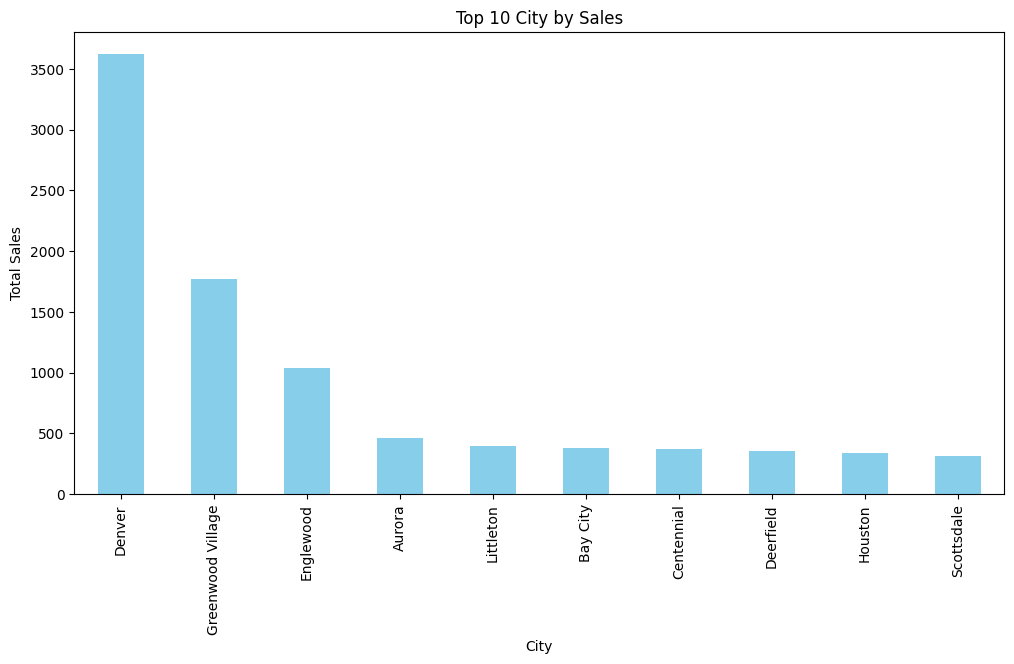

In [18]:
sales_by_country = df.groupby('Billing city')['Gross sales'].sum().sort_values(ascending=False)
plt.figure(figsize=(12, 6))
sales_by_country.head(10).plot(kind='bar', color='skyblue')
plt.title('Top 10 City by Sales')
plt.xlabel('City')
plt.ylabel('Total Sales')
plt.show()

In [19]:
#Identify Outliers: Use boxplots to identify outliers in numerical columns like Price and Quantity.

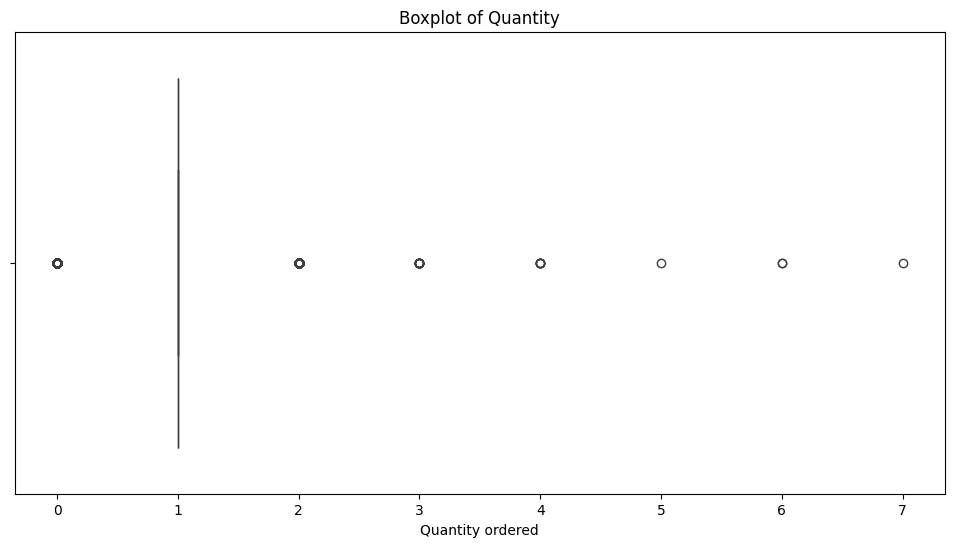

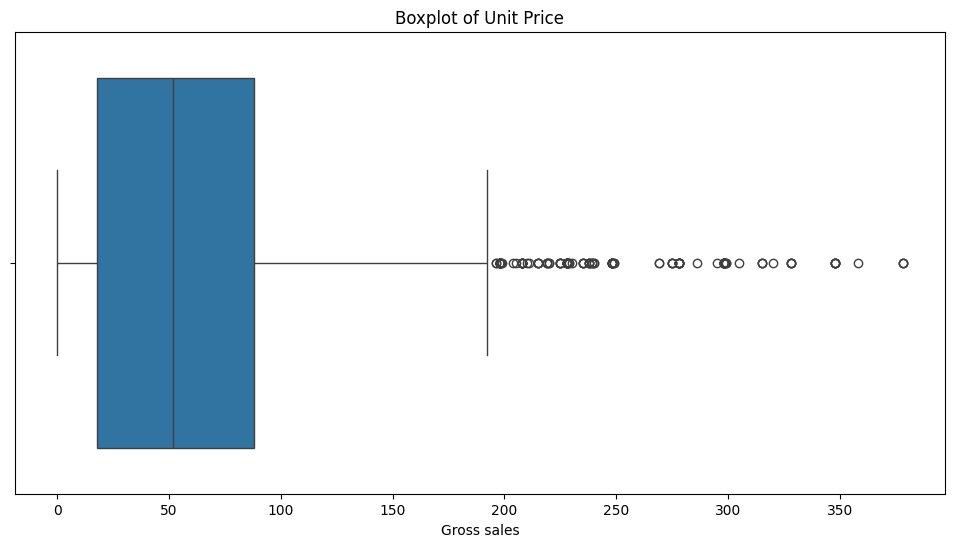

In [20]:
plt.figure(figsize=(12, 6))
sns.boxplot(x=df['Quantity ordered'])
plt.title('Boxplot of Quantity')
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(x=df['Gross sales'])
plt.title('Boxplot of Unit Price')
plt.show()


In [21]:
df.describe(include='O')  #info: Provides descriptive statistics for object-type (categorical) columns like count, unique values, most frequent (top) value, and its frequency.

,Product title,Product type,Product vendor,Billing city,Billing region,Billing postal code,Staff member name,Sales channel,SKU,POS location name
count,7388,7374,7388,334,334,334,7754,8083,7381,7768
unique,1805,14,154,85,32,97,9,5,4453,2
top,Leto | Lace Racerback Bralette,Women's Clothing,Dear John,Denver,Colorado,80113,Kristi Graning,Point of Sale,PP441SET,"Goose & the Goat, Cherry Hills"
freq,116,3643,746,58,169,27,2195,7768,46,6377


In [22]:
df[df["Customer ID"].isna()].head(10)

,Day,Product title,Product type,Product vendor,Order ID,Billing city,Billing region,Billing postal code,Customer ID,Staff member name,Sales channel,SKU,POS location name,Orders,Gross sales,Discounts,Returns,Net sales,Shipping charges,Duties,Additional fees,Taxes,Total sales,Quantity ordered,Gross margin,Gross profit,Gross returns,Net returns,Total returns,Total shipping charges,Cost of goods sold
2466,2024-03-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0.00,0.00,0.00,0.00,0.00,0,0,0.00,0.00,0,NaN,0.00,0.00,0.00,0.00,0.00,0.00
7142,2024-11-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0.00,0.00,0.00,0.00,0.00,0,0,0.00,0.00,0,NaN,0.00,0.00,0.00,0.00,0.00,0.00


In [23]:
df[df["Quantity ordered"] < 0].head(10) #checking Negative Quantity

,Day,Product title,Product type,Product vendor,Order ID,Billing city,Billing region,Billing postal code,Customer ID,Staff member name,Sales channel,SKU,POS location name,Orders,Gross sales,Discounts,Returns,Net sales,Shipping charges,Duties,Additional fees,Taxes,Total sales,Quantity ordered,Gross margin,Gross profit,Gross returns,Net returns,Total returns,Total shipping charges,Cost of goods sold


In [24]:
df["Order ID"] = df["Order ID"].astype("str") # short info: Convert 'Invoice' column to string type for string operations.
df[df["Order ID"].str.match("^\\d{15}$") == False] ## short info: Filter rows with 'Invoice' values that are not exactly 6 digits long.

,Day,Product title,Product type,Product vendor,Order ID,Billing city,Billing region,Billing postal code,Customer ID,Staff member name,Sales channel,SKU,POS location name,Orders,Gross sales,Discounts,Returns,Net sales,Shipping charges,Duties,Additional fees,Taxes,Total sales,Quantity ordered,Gross margin,Gross profit,Gross returns,Net returns,Total returns,Total shipping charges,Cost of goods sold
0,2024-01-01,Echo | Touch Glove,Accessories,Echo,5201075830843.0,North Versailles,Pennsylvania,15137,6419200737339.00,NaN,Online Store,EG0290-026,NaN,1,49.00,0.00,0.00,49.00,0.00,0,0,0.00,49.00,1,0.62,30.40,0.00,0.00,0.00,0.00,18.60
1,2024-01-01,NaN,NaN,NaN,5201075830843.0,North Versailles,Pennsylvania,15137,6419200737339.00,NaN,Online Store,NaN,NaN,0,0.00,0.00,0.00,0.00,3.90,0,0,0.00,3.90,0,NaN,0.00,0.00,0.00,0.00,3.90,0.00
2,2024-01-02,Volatile | Flagstaff,Women's Footwear,Very Volatile,5196038799419.0,NaN,NaN,NaN,6414354186299.00,Billy Kid,Point of Sale,PV306TAU-10,"OGBG, Stanley",0,98.00,0.00,0.00,98.00,0.00,0,0,8.34,106.34,0,0.61,59.50,0.00,0.00,0.00,0.00,38.50
3,2024-01-02,Chez Gagné | I'm Sorry I Called You Old,Gifts,Chez Gange,5202637652027.0,NaN,NaN,NaN,0.00,Kristi Graning,Point of Sale,1407,"Goose & the Goat, Cherry Hills",1,6.00,0.00,0.00,6.00,0.00,0,0,0.44,6.44,1,0.50,3.00,0.00,0.00,0.00,0.00,3.00
4,2024-01-02,NaN,NaN,NaN,5202674810939.0,NaN,NaN,NaN,0.00,Danielle Patton,Point of Sale,NaN,"OGBG, Stanley",1,0.90,0.00,0.00,0.90,0.00,0,0,0.08,0.98,1,NaN,0.00,0.00,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8080,2024-12-31,Cool & Interesting | Huggie Hoops,Jewelry,Cool & Interesting,5651673382971.0,NaN,NaN,NaN,6858968694843.00,Zada Soqui,Point of Sale,23864,"Goose & the Goat, Cherry Hills",1,25.00,0.00,0.00,25.00,0.00,0,0,1.82,26.82,1,0.60,15.00,0.00,0.00,0.00,0.00,10.00
8081,2024-12-31,Keep Nature Wild | Outsider Sticker,Accessories,Keep Nature Wild,5651810582587.0,Denver,Colorado,80206,7004557574203.00,NaN,Online Store,S-OUTSIDER,NaN,1,4.00,0.00,0.00,4.00,0.00,0,0,0.35,4.35,1,0.50,2.00,0.00,0.00,0.00,0.00,2.00
8082,2024-12-31,NaN,NaN,NaN,5651991461947.0,Denver,Colorado,80237,3092530561083.00,NaN,Online Store,NaN,NaN,0,0.00,0.00,0.00,0.00,0.00,0,0,0.00,0.00,0,NaN,0.00,0.00,0.00,0.00,0.00,0.00
8083,2024-12-31,Dear John | Britney,Women's Clothing,Dear John,5651673382971.0,NaN,NaN,NaN,6858968694843.00,Zada Soqui,Point of Sale,DSW3131ATW-L,"Goose & the Goat, Cherry Hills",1,88.00,-26.40,0.00,61.60,0.00,0,0,4.47,66.07,1,0.35,21.60,0.00,0.00,0.00,0.00,40.00


In [25]:
#Replace all digits in 'Invoice' with an empty string and get unique non-numeric values.
df["Order ID"].str.replace("[0-9]", "", regex=True).unique() 

array(['.', 'nan'], dtype=object)

In [26]:
#finding above funcky stockcode that do not follow pattern with some of do not have customer etc
#checking every non match if they imp or not

In [27]:
# df[df["SKU"].str.contains("^DOT")]

# Data Cleaning 

In [28]:
cleaned_df = df.copy()

In [88]:
# Convert 'Invoice' to string type, create a mask for rows with exactly 6-digit invoices, and filter 'cleaned_df' based on this mask.


,Day,Product title,Product type,Product vendor,Order ID,Billing city,Billing region,Billing postal code,Customer ID,Staff member name,Sales channel,SKU,POS location name,Orders,Gross sales,Discounts,Returns,Net sales,Shipping charges,Duties,Additional fees,Taxes,Total sales,Quantity ordered,Gross margin,Gross profit,Gross returns,Net returns,Total returns,Total shipping charges,Cost of goods sold
0,2024-01-01,Echo | Touch Glove,Accessories,Echo,5201075830843.0,North Versailles,Pennsylvania,15137,6419200737339.00,NaN,Online Store,000005201075830843.0,NaN,1,49.00,0.00,0.00,49.00,0.00,0,0,0.00,49.00,1,0.62,30.40,0.00,0.00,0.00,0.00,18.60
1,2024-01-01,NaN,NaN,NaN,5201075830843.0,North Versailles,Pennsylvania,15137,6419200737339.00,NaN,Online Store,000005201075830843.0,NaN,0,0.00,0.00,0.00,0.00,3.90,0,0,0.00,3.90,0,NaN,0.00,0.00,0.00,0.00,3.90,0.00
2,2024-01-02,Volatile | Flagstaff,Women's Footwear,Very Volatile,5196038799419.0,NaN,NaN,NaN,6414354186299.00,Billy Kid,Point of Sale,000005196038799419.0,"OGBG, Stanley",0,98.00,0.00,0.00,98.00,0.00,0,0,8.34,106.34,0,0.61,59.50,0.00,0.00,0.00,0.00,38.50
3,2024-01-02,Chez Gagné | I'm Sorry I Called You Old,Gifts,Chez Gange,5202637652027.0,NaN,NaN,NaN,0.00,Kristi Graning,Point of Sale,000005202637652027.0,"Goose & the Goat, Cherry Hills",1,6.00,0.00,0.00,6.00,0.00,0,0,0.44,6.44,1,0.50,3.00,0.00,0.00,0.00,0.00,3.00
4,2024-01-02,NaN,NaN,NaN,5202674810939.0,NaN,NaN,NaN,0.00,Danielle Patton,Point of Sale,000005202674810939.0,"OGBG, Stanley",1,0.90,0.00,0.00,0.90,0.00,0,0,0.08,0.98,1,NaN,0.00,0.00,0.00,0.00,0.00,0.00


In [29]:
import warnings  # short info: Import the warnings library to control warning messages.
warnings.filterwarnings("ignore")  # short info: Suppress all warning messages.

In [30]:
cleaned_df.dropna(subset=["Customer ID"], inplace=True)

In [31]:
cleaned_df.describe()

,Day,Customer ID,Orders,Gross sales,Discounts,Returns,Net sales,Shipping charges,Duties,Additional fees,Taxes,Total sales,Quantity ordered,Gross margin,Gross profit,Gross returns,Net returns,Total returns,Total shipping charges,Cost of goods sold
count,8083,8083.00,8083.00,8083.00,8083.00,8083.00,8083.00,8083.00,8083.00,8083.00,8083.00,8083.00,8083.00,7335.00,8083.00,8083.00,8083.00,8083.00,8083.00,8083.00
mean,2024-06-21 06:19:38.473339136,4344387933128.93,0.93,60.93,-8.72,-2.16,50.06,0.05,0.00,0.00,3.61,53.71,0.95,0.45,25.18,-2.32,-2.16,-2.31,0.05,24.61
min,2024-01-01 00:00:00,0.00,0.00,0.00,-202.80,-248.00,-248.00,-4.19,0.00,0.00,-17.98,-265.98,0.00,-42.61,-135.00,-248.00,-248.00,-265.98,-4.61,-113.00
25%,2024-03-02 00:00:00,3092516700219.00,1.00,18.00,-9.34,0.00,15.00,0.00,0.00,0.00,1.04,16.07,1.00,0.44,3.00,0.00,0.00,0.00,0.00,6.80
50%,2024-06-08 00:00:00,5597881008187.00,1.00,52.00,0.00,0.00,40.00,0.00,0.00,0.00,2.90,42.90,1.00,0.55,19.88,0.00,0.00,0.00,0.00,22.00
75%,2024-09-29 00:00:00,6501654609979.00,1.00,88.00,0.00,0.00,78.00,0.00,0.00,0.00,5.66,83.66,1.00,0.59,43.00,0.00,0.00,0.00,0.00,38.00
max,2024-12-31 00:00:00,7004557574203.00,1.00,378.00,0.00,149.75,378.00,15.28,0.00,0.00,26.25,378.00,7.00,0.97,228.10,149.75,149.75,149.75,15.28,149.90
std,NaN,2582965760709.34,0.26,52.47,18.05,15.14,52.03,0.52,0.00,0.00,3.76,55.66,0.33,0.57,30.38,16.07,15.14,16.19,0.53,24.87


In [38]:
# short info: Calculate the number of rows in 'cleaned_df' where the 'Price' column is equal to 0.

In [32]:
len(cleaned_df[cleaned_df["Gross sales"] == 0])

429

In [40]:
#dealing issue having 0 value

In [33]:
cleaned_df["Gross sales"].min()

0.0

In [34]:
len(cleaned_df)/len(df) # drop 23 % records for 

0.9997526283240569

In [35]:
cleaned_df = cleaned_df[cleaned_df["Gross sales"] > 0.0]

# Feature Engineering

In [36]:
cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7654 entries, 0 to 8084
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Day                     7654 non-null   datetime64[ns]
 1   Product title           7186 non-null   object        
 2   Product type            7172 non-null   object        
 3   Product vendor          7186 non-null   object        
 4   Order ID                7654 non-null   object        
 5   Billing city            180 non-null    object        
 6   Billing region          180 non-null    object        
 7   Billing postal code     180 non-null    object        
 8   Customer ID             7654 non-null   float64       
 9   Staff member name       7477 non-null   object        
 10  Sales channel           7654 non-null   object        
 11  SKU                     7190 non-null   object        
 12  POS location name       7488 non-null   object       

In [37]:
cleaned_df["SalesLineTotal"] = cleaned_df["Quantity ordered"] * cleaned_df["Gross sales"]

cleaned_df

,Day,Product title,Product type,Product vendor,Order ID,Billing city,Billing region,Billing postal code,Customer ID,Staff member name,Sales channel,SKU,POS location name,Orders,Gross sales,Discounts,Returns,Net sales,Shipping charges,Duties,Additional fees,Taxes,Total sales,Quantity ordered,Gross margin,Gross profit,Gross returns,Net returns,Total returns,Total shipping charges,Cost of goods sold,SalesLineTotal
0,2024-01-01,Echo | Touch Glove,Accessories,Echo,5201075830843.0,North Versailles,Pennsylvania,15137,6419200737339.00,NaN,Online Store,EG0290-026,NaN,1,49.00,0.00,0.00,49.00,0.00,0,0,0.00,49.00,1,0.62,30.40,0.00,0.00,0.00,0.00,18.60,49.00
2,2024-01-02,Volatile | Flagstaff,Women's Footwear,Very Volatile,5196038799419.0,NaN,NaN,NaN,6414354186299.00,Billy Kid,Point of Sale,PV306TAU-10,"OGBG, Stanley",0,98.00,0.00,0.00,98.00,0.00,0,0,8.34,106.34,0,0.61,59.50,0.00,0.00,0.00,0.00,38.50,0.00
3,2024-01-02,Chez Gagné | I'm Sorry I Called You Old,Gifts,Chez Gange,5202637652027.0,NaN,NaN,NaN,0.00,Kristi Graning,Point of Sale,1407,"Goose & the Goat, Cherry Hills",1,6.00,0.00,0.00,6.00,0.00,0,0,0.44,6.44,1,0.50,3.00,0.00,0.00,0.00,0.00,3.00,6.00
4,2024-01-02,NaN,NaN,NaN,5202674810939.0,NaN,NaN,NaN,0.00,Danielle Patton,Point of Sale,NaN,"OGBG, Stanley",1,0.90,0.00,0.00,0.90,0.00,0,0,0.08,0.98,1,NaN,0.00,0.00,0.00,0.00,0.00,0.00,0.90
5,2024-01-02,Goose & the Goat | Permanent Jewelry,Jewelry,Goose & the Goat,5202680643643.0,NaN,NaN,NaN,6420654096443.00,Kristi Graning,Point of Sale,PJ-KHART-BR-S,"Goose & the Goat, Cherry Hills",1,45.00,0.00,0.00,45.00,0.00,0,0,3.27,48.27,1,0.95,42.75,0.00,0.00,0.00,0.00,2.25,45.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8079,2024-12-31,Poppy & Pout | Lip Balm,Accessories,Poppy & Pout,5651601293371.0,NaN,NaN,NaN,0.00,Zada Soqui,Point of Sale,PP-BALM-SM,"Goose & the Goat, Cherry Hills",1,9.95,0.00,0.00,9.95,0.00,0,0,0.72,10.67,1,0.55,5.45,0.00,0.00,0.00,0.00,4.50,9.95
8080,2024-12-31,Cool & Interesting | Huggie Hoops,Jewelry,Cool & Interesting,5651673382971.0,NaN,NaN,NaN,6858968694843.00,Zada Soqui,Point of Sale,23864,"Goose & the Goat, Cherry Hills",1,25.00,0.00,0.00,25.00,0.00,0,0,1.82,26.82,1,0.60,15.00,0.00,0.00,0.00,0.00,10.00,25.00
8081,2024-12-31,Keep Nature Wild | Outsider Sticker,Accessories,Keep Nature Wild,5651810582587.0,Denver,Colorado,80206,7004557574203.00,NaN,Online Store,S-OUTSIDER,NaN,1,4.00,0.00,0.00,4.00,0.00,0,0,0.35,4.35,1,0.50,2.00,0.00,0.00,0.00,0.00,2.00,4.00
8083,2024-12-31,Dear John | Britney,Women's Clothing,Dear John,5651673382971.0,NaN,NaN,NaN,6858968694843.00,Zada Soqui,Point of Sale,DSW3131ATW-L,"Goose & the Goat, Cherry Hills",1,88.00,-26.40,0.00,61.60,0.00,0,0,4.47,66.07,1,0.35,21.60,0.00,0.00,0.00,0.00,40.00,88.00


In [38]:
aggregated_df = cleaned_df.groupby(by="Customer ID", as_index=False) \
    .agg(
        MonetaryValue=("SalesLineTotal", "sum"),
        Frequency=("Order ID", "nunique"),
        LastInvoiceDate=("Day", "max")
    )

aggregated_df.head(5)

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate
0,0.00,66817.05,844,2024-12-31
1,3092447854651.00,112.95,1,2024-08-31
2,3092451786811.00,737.30,5,2024-10-13
3,3092467712059.00,94.00,1,2024-03-14
4,3092470366267.00,38.38,1,2024-02-24


In [39]:
max_invoice_date = aggregated_df["LastInvoiceDate"].max()
aggregated_df["Recency"] = (max_invoice_date - aggregated_df["LastInvoiceDate"]).dt.days
aggregated_df.head(5)

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency
0,0.00,66817.05,844,2024-12-31,0
1,3092447854651.00,112.95,1,2024-08-31,122
2,3092451786811.00,737.30,5,2024-10-13,79
3,3092467712059.00,94.00,1,2024-03-14,292
4,3092470366267.00,38.38,1,2024-02-24,311


# Finding Outlier

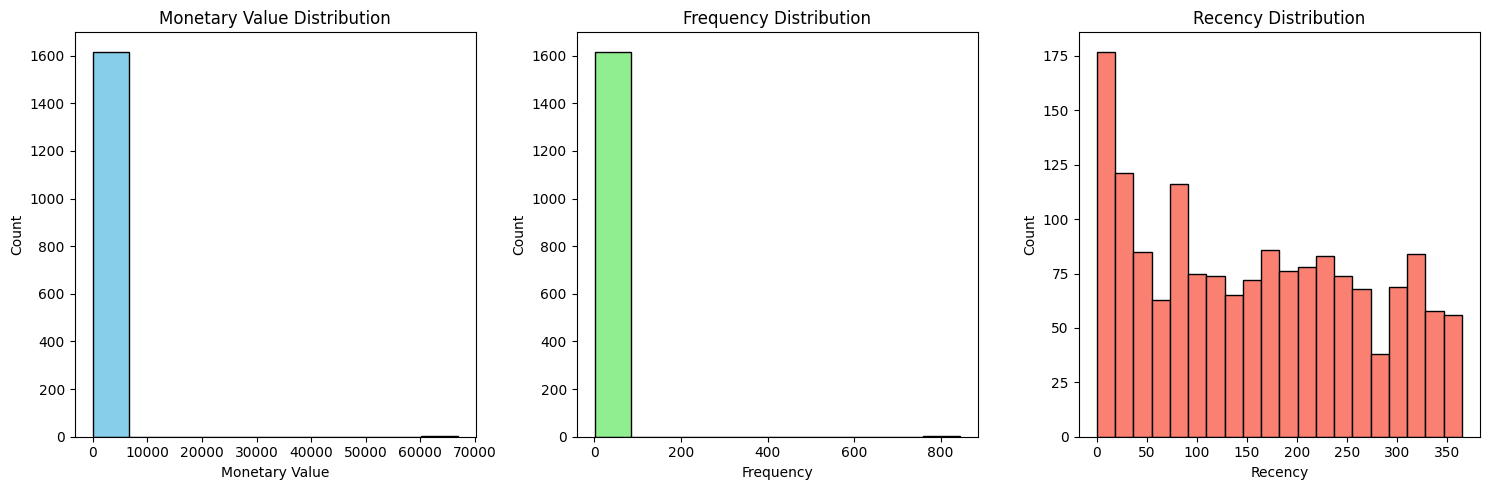

In [41]:
# Set the figure size for the entire plot
plt.figure(figsize=(15, 5))  # short info: Create a figure with a width of 15 inches and a height of 5 inches.

# Subplot 1: Histogram of Monetary Value
plt.subplot(1, 3, 1)  # short info: Create a 1x3 grid of subplots, and select the 1st subplot.
plt.hist(aggregated_df['MonetaryValue'], bins=10, color='skyblue', edgecolor='black')  # short info: Create a histogram for 'MonetaryValue' with 10 bins.
plt.title('Monetary Value Distribution')  # short info: Set the title for the first subplot.
plt.xlabel('Monetary Value')  # short info: Label the x-axis.
plt.ylabel('Count')  # short info: Label the y-axis.

# Subplot 2: Histogram of Frequency
plt.subplot(1, 3, 2)  # short info: Select the 2nd subplot in the 1x3 grid.
plt.hist(aggregated_df['Frequency'], bins=10, color='lightgreen', edgecolor='black')  # short info: Create a histogram for 'Frequency' with 10 bins.
plt.title('Frequency Distribution')  # short info: Set the title for the second subplot.
plt.xlabel('Frequency')  # short info: Label the x-axis.
plt.ylabel('Count')  # short info: Label the y-axis.

# Subplot 3: Histogram of Recency
plt.subplot(1, 3, 3)  # short info: Select the 3rd subplot in the 1x3 grid.
plt.hist(aggregated_df['Recency'], bins=20, color='salmon', edgecolor='black')  # short info: Create a histogram for 'Recency' with 20 bins.
plt.title('Recency Distribution')  # short info: Set the title for the third subplot.
plt.xlabel('Recency')  # short info: Label the x-axis.
plt.ylabel('Count')  # short info: Label the y-axis.

plt.tight_layout()  # short info: Adjust subplot parameters to give specified padding for a cleaner layout.
plt.show()  # short info: Display the plots.


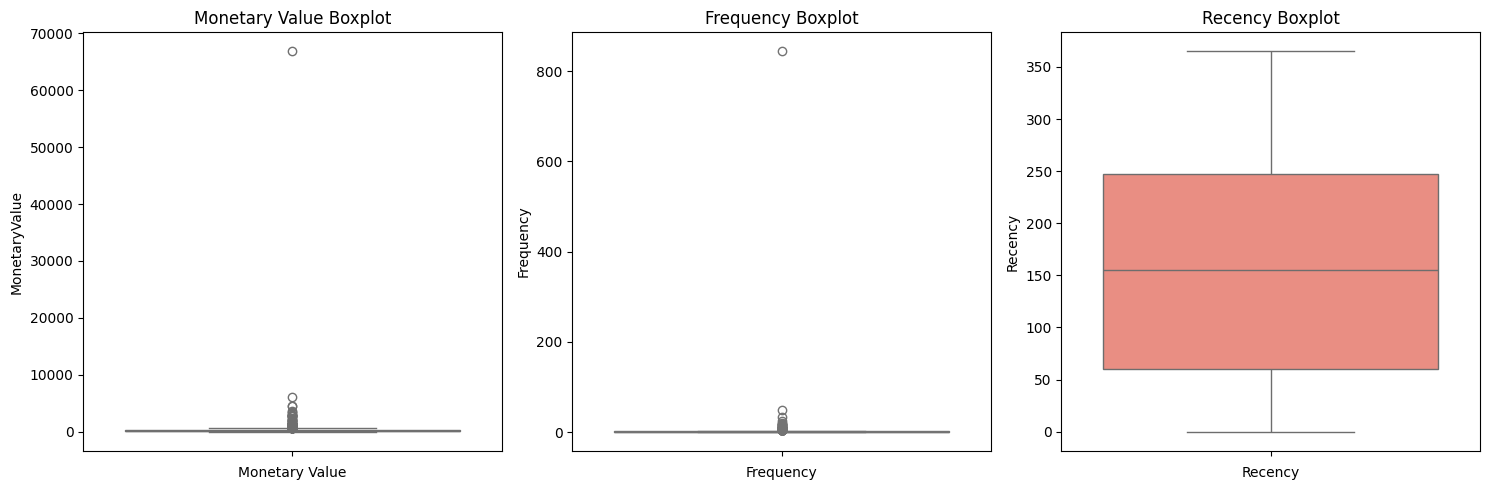

In [42]:
# Set the figure size for the entire plot
plt.figure(figsize=(15, 5))  # short info: Create a figure with a width of 15 inches and a height of 5 inches.

# Subplot 1: Boxplot of Monetary Value
plt.subplot(1, 3, 1)  # short info: Create a 1x3 grid of subplots, and select the 1st subplot.
sns.boxplot(data=aggregated_df['MonetaryValue'], color='skyblue')  # short info: Create a boxplot for 'MonetaryValue'.
plt.title('Monetary Value Boxplot')  # short info: Set the title for the first subplot.
plt.xlabel('Monetary Value')  # short info: Label the x-axis.

# Subplot 2: Boxplot of Frequency
plt.subplot(1, 3, 2)  # short info: Select the 2nd subplot in the 1x3 grid.
sns.boxplot(data=aggregated_df['Frequency'], color='lightgreen')  # short info: Create a boxplot for 'Frequency'.
plt.title('Frequency Boxplot')  # short info: Set the title for the second subplot.
plt.xlabel('Frequency')  # short info: Label the x-axis.

# Subplot 3: Boxplot of Recency
plt.subplot(1, 3, 3)  # short info: Select the 3rd subplot in the 1x3 grid.
sns.boxplot(data=aggregated_df['Recency'], color='salmon')  # short info: Create a boxplot for 'Recency'.
plt.title('Recency Boxplot')  # short info: Set the title for the third subplot.
plt.xlabel('Recency')  # short info: Label the x-axis.

plt.tight_layout()  # short info: Adjust subplot parameters to give specified padding for a cleaner layout.
plt.show()  # short info: Display the plots.


# Monetay and Freq have high outlier

## Establishing IQR

In [43]:
M_Q1 = aggregated_df["MonetaryValue"].quantile(0.25)
M_Q3 = aggregated_df["MonetaryValue"].quantile(0.75)
M_IQR = M_Q3 - M_Q1

monetary_outliers_df = aggregated_df[(aggregated_df["MonetaryValue"] > (M_Q3 + 1.5 * M_IQR)) | (aggregated_df["MonetaryValue"] < (M_Q1 - 1.5 * M_IQR))].copy()
#short conclusion: This code creates a new DataFrame, 'monetary_outliers_df', containing rows from 'aggregated_df'
#where 'MonetaryValue' values are considered outliers, defined as being greater than 1.5 times the interquartile range (IQR) 
#above the third quartile (Q3) or below 1.5 times the IQR below the first quartile (Q1).

monetary_outliers_df.describe()

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency
count,129.00,129.00,129.00,129,129.00
mean,5343903290894.88,1744.71,12.11,2024-10-20 09:18:08.372092928,71.61
min,0.00,636.00,1.00,2024-01-12 00:00:00,0.00
25%,3813364301883.00,756.00,2.00,2024-09-28 00:00:00,15.00
50%,5919619842107.00,917.00,4.00,2024-11-23 00:00:00,38.00
75%,6466660761659.00,1229.50,6.00,2024-12-16 00:00:00,94.00
max,6989611663419.00,66817.05,844.00,2024-12-31 00:00:00,354.00
std,1472872947459.93,5840.50,74.08,NaN,80.93


In [44]:
F_Q1 = aggregated_df['Frequency'].quantile(0.25)
F_Q3 = aggregated_df['Frequency'].quantile(0.75)
F_IQR = F_Q3 - F_Q1

frequency_outliers_df = aggregated_df[(aggregated_df['Frequency'] > (F_Q3 + 1.5 * F_IQR)) | (aggregated_df['Frequency'] < (F_Q1 - 1.5 * F_IQR))].copy()

frequency_outliers_df.describe()

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency
count,119.00,119.00,119.00,119,119.00
mean,5057233638983.41,1608.86,13.86,2024-11-11 18:21:10.588235264,49.24
min,0.00,137.75,4.00,2024-07-05 00:00:00,0.00
25%,3436015239227.00,482.00,4.00,2024-10-12 12:00:00,11.00
50%,5571230728251.00,737.30,5.00,2024-12-06 00:00:00,25.00
75%,6330028228667.00,1125.47,7.00,2024-12-20 00:00:00,79.50
max,6983645691963.00,66817.05,844.00,2024-12-31 00:00:00,179.00
std,1461687058331.89,6111.33,76.97,NaN,49.34


In [45]:
# This code creates a new DataFrame, 'non_outliers_df', by filtering out rows from 'aggregated_df' that are present in either 'monetary_outliers_df' or 'frequency_outliers_df'. 
#It then provides descriptive statistics for the resulting DataFrame, summarizing the central tendency, dispersion, and shape of the dataset's distribution for non-outlier values.

non_outliers_df = aggregated_df[(~aggregated_df.index.isin(monetary_outliers_df.index)) & (~aggregated_df.index.isin(frequency_outliers_df.index))]

non_outliers_df.describe()

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency
count,1442.00,1442.00,1442.00,1442,1442.00
mean,5936815306200.29,168.70,1.25,2024-07-14 00:33:57.170596352,169.98
min,3092447854651.00,0.00,1.00,2024-01-01 00:00:00,0.00
25%,5565630767163.00,72.00,1.00,2024-04-17 06:00:00,79.00
50%,6489583173691.00,123.00,1.00,2024-07-14 00:00:00,170.00
75%,6711822565435.00,229.75,1.00,2024-10-13 00:00:00,257.75
max,7004557574203.00,627.00,3.00,2024-12-31 00:00:00,365.00
std,1195495968229.57,137.16,0.53,NaN,107.11


# Replot boxplot using Non Outlier

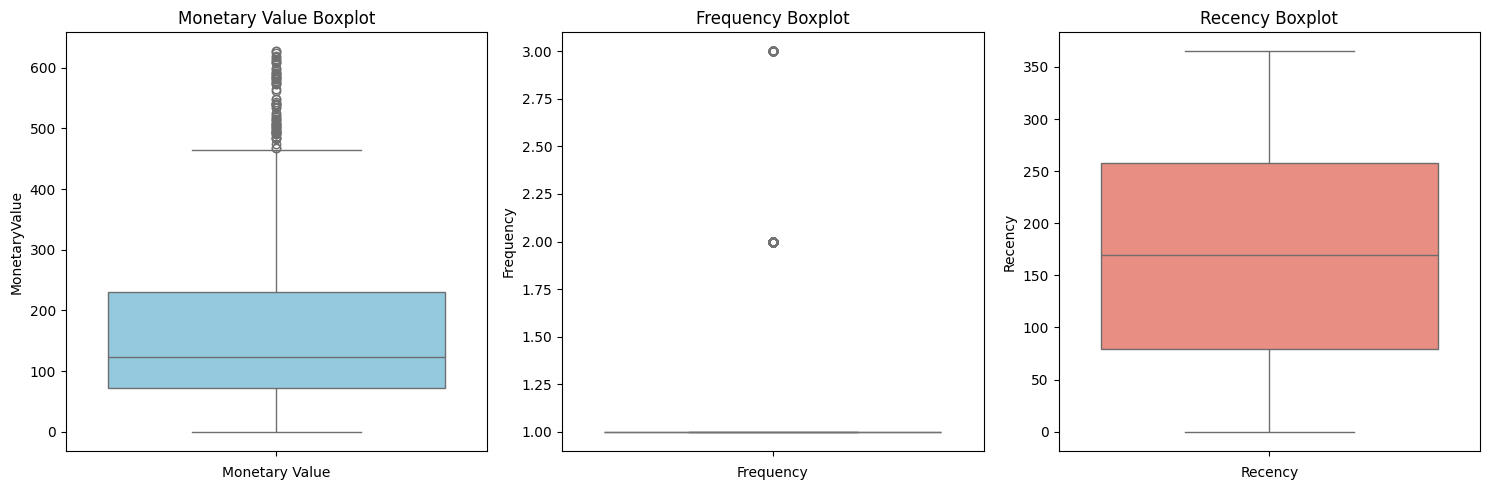

In [46]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.boxplot(data=non_outliers_df['MonetaryValue'], color='skyblue')
plt.title('Monetary Value Boxplot')
plt.xlabel('Monetary Value')

plt.subplot(1, 3, 2)
sns.boxplot(data=non_outliers_df['Frequency'], color='lightgreen')
plt.title('Frequency Boxplot')
plt.xlabel('Frequency')

plt.subplot(1, 3, 3)
sns.boxplot(data=non_outliers_df['Recency'], color='salmon')
plt.title('Recency Boxplot')
plt.xlabel('Recency')

plt.tight_layout()
plt.show()

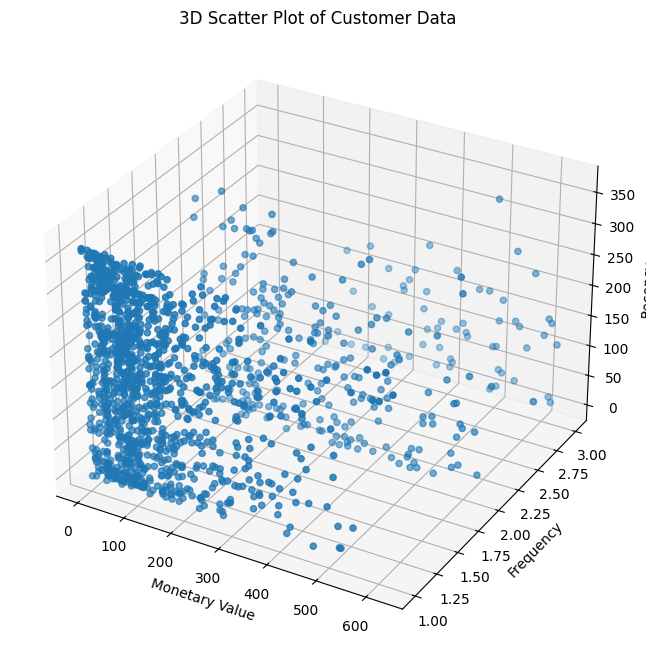

In [47]:
fig = plt.figure(figsize=(8, 8))

ax = fig.add_subplot(projection="3d")

scatter = ax.scatter(non_outliers_df["MonetaryValue"], non_outliers_df["Frequency"], non_outliers_df["Recency"])

ax.set_xlabel('Monetary Value')
ax.set_ylabel('Frequency')
ax.set_zlabel('Recency')

ax.set_title('3D Scatter Plot of Customer Data')

plt.show()

In [48]:
scaler = StandardScaler()

scaled_data = scaler.fit_transform(non_outliers_df[["MonetaryValue", "Frequency", "Recency"]])

scaled_data

array([[-0.40662749, -0.46970066, -0.4480738 ],
       [-0.54483356, -0.46970066,  1.13963416],
       [-0.95048112, -0.46970066,  1.31708388],
       ...,
       [ 2.18282177, -0.46970066, -1.5781483 ],
       [-0.97549679, -0.46970066, -1.58748776],
       [-1.2012212 , -0.46970066, -1.58748776]])

In [49]:
scaled_data_df = pd.DataFrame(scaled_data, index=non_outliers_df.index, columns=("MonetaryValue", "Frequency", "Recency"))

scaled_data_df

,MonetaryValue,Frequency,Recency
1,-0.41,-0.47,-0.45
3,-0.54,-0.47,1.14
4,-0.95,-0.47,1.32
5,-0.33,-0.47,-0.63
6,-0.46,1.43,-0.87
...,...,...,...
1613,-0.73,-0.47,-1.57
1614,-1.14,-0.47,-1.57
1615,2.18,-0.47,-1.58
1616,-0.98,-0.47,-1.59


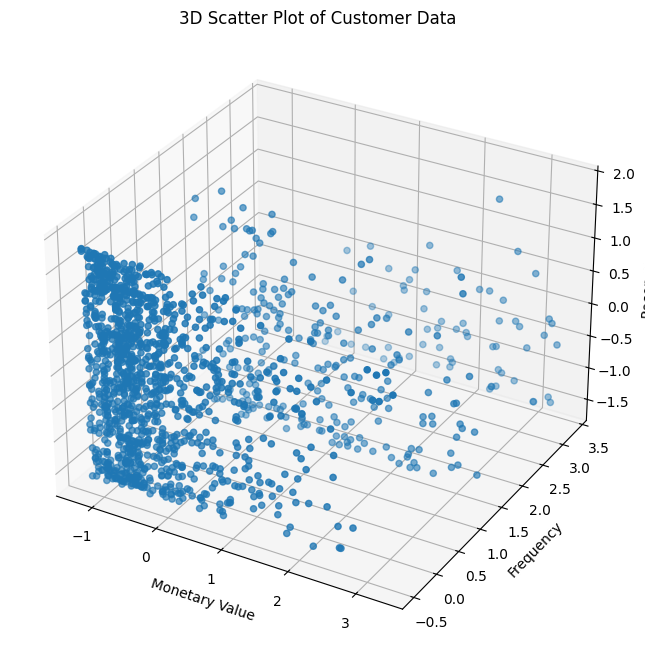

In [50]:
fig = plt.figure(figsize=(8, 8))

ax = fig.add_subplot(projection="3d")

scatter = ax.scatter(scaled_data_df["MonetaryValue"], scaled_data_df["Frequency"], scaled_data_df["Recency"])

ax.set_xlabel('Monetary Value')
ax.set_ylabel('Frequency')
ax.set_zlabel('Recency')

ax.set_title('3D Scatter Plot of Customer Data')

plt.show()

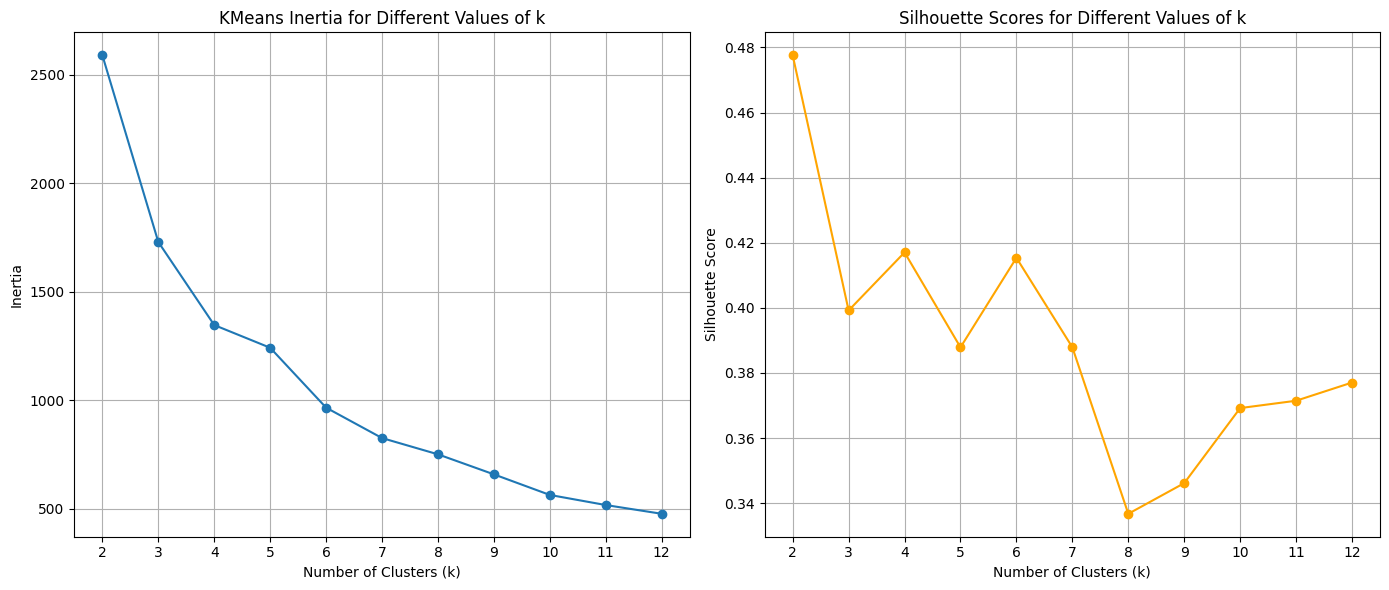

In [51]:
max_k = 12

inertia = []
silhoutte_scores = []
k_values = range(2, max_k + 1)

for k in k_values:

    kmeans = KMeans(n_clusters=k, random_state=42, max_iter=1000)

    cluster_labels = kmeans.fit_predict(scaled_data_df)

    sil_score = silhouette_score(scaled_data_df, cluster_labels)

    silhoutte_scores.append(sil_score)

    inertia.append(kmeans.inertia_)

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.plot(k_values, inertia, marker='o')
plt.title('KMeans Inertia for Different Values of k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.xticks(k_values)
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(k_values, silhoutte_scores, marker='o', color='orange')
plt.title('Silhouette Scores for Different Values of k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.xticks(k_values)
plt.grid(True)

plt.tight_layout()
plt.show()

# Silhouette Score

In [52]:
kmeans = KMeans(n_clusters=4, random_state=42, max_iter=1000)

cluster_labels = kmeans.fit_predict(scaled_data_df)

cluster_labels

array([3, 2, 2, ..., 1, 3, 3], dtype=int32)

In [53]:
non_outliers_df["Cluster"] = cluster_labels

non_outliers_df

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency,Cluster
1,3092447854651.00,112.95,1,2024-08-31,122,3
3,3092467712059.00,94.00,1,2024-03-14,292,2
4,3092470366267.00,38.38,1,2024-02-24,311,2
5,3092472660027.00,123.00,1,2024-09-20,102,3
6,3092472823867.00,106.00,2,2024-10-15,77,0
...,...,...,...,...,...,...
1613,7001704398907.00,68.00,1,2024-12-29,2,3
1614,7001742082107.00,12.95,1,2024-12-29,2,3
1615,7003895824443.00,468.00,1,2024-12-30,1,1
1616,7004407660603.00,34.95,1,2024-12-31,0,3


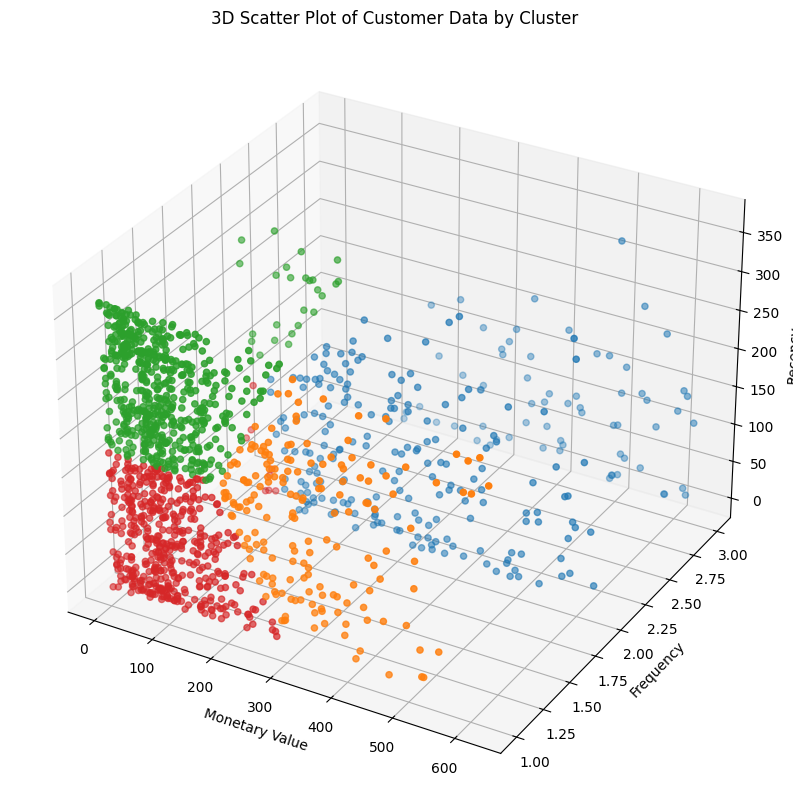

In [54]:
cluster_colors = {0: '#1f77b4',  # Blue
                  1: '#ff7f0e',  # Orange
                  2: '#2ca02c',  # Green
                  3: '#d62728'}  # Red

colors = non_outliers_df['Cluster'].map(cluster_colors)

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(projection='3d')

scatter = ax.scatter(non_outliers_df['MonetaryValue'], 
                     non_outliers_df['Frequency'], 
                     non_outliers_df['Recency'], 
                     c=colors,  # Use mapped solid colors
                     marker='o')

ax.set_xlabel('Monetary Value')
ax.set_ylabel('Frequency')
ax.set_zlabel('Recency')

ax.set_title('3D Scatter Plot of Customer Data by Cluster')

plt.show()

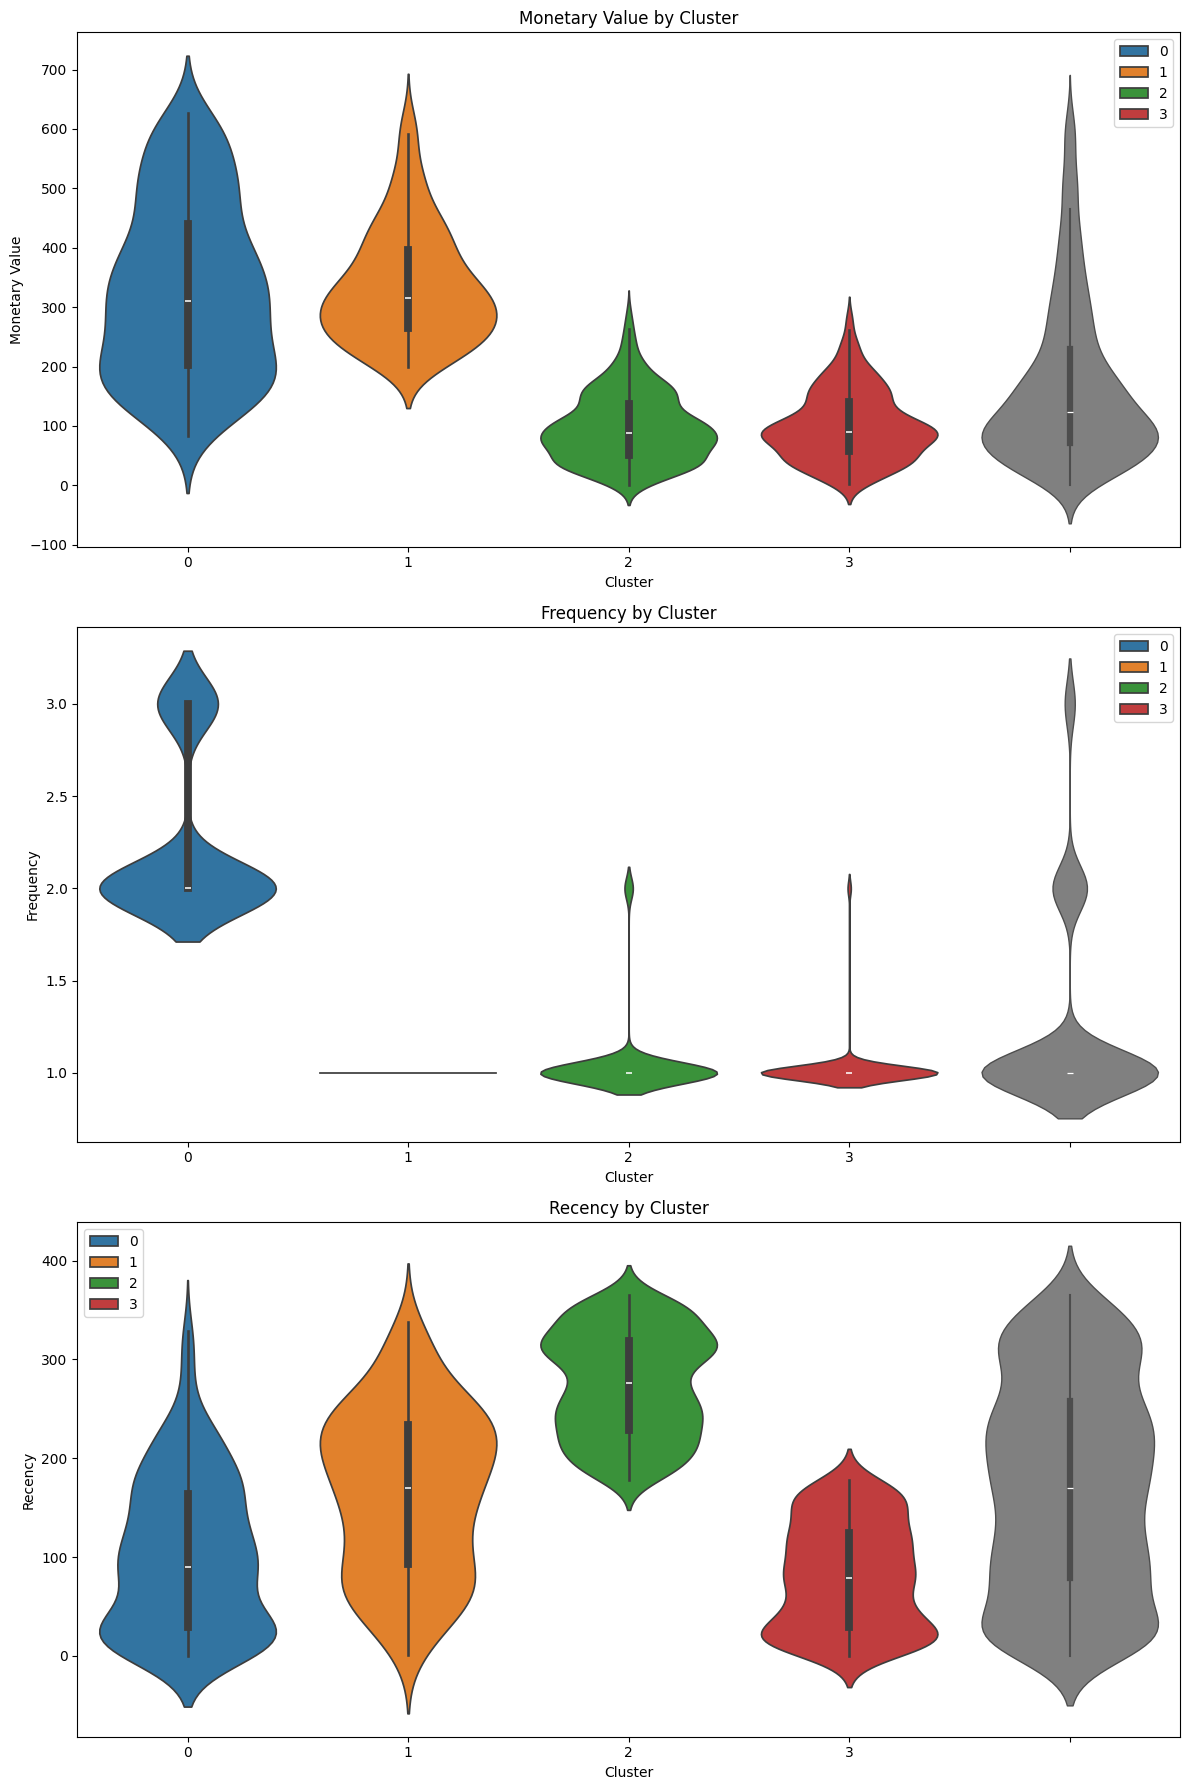

In [55]:
plt.figure(figsize=(12, 18))

plt.subplot(3, 1, 1)
sns.violinplot(x=non_outliers_df['Cluster'], y=non_outliers_df['MonetaryValue'], palette=cluster_colors, hue=non_outliers_df["Cluster"])
sns.violinplot(y=non_outliers_df['MonetaryValue'], color='gray', linewidth=1.0)
plt.title('Monetary Value by Cluster')
plt.ylabel('Monetary Value')

plt.subplot(3, 1, 2)
sns.violinplot(x=non_outliers_df['Cluster'], y=non_outliers_df['Frequency'], palette=cluster_colors, hue=non_outliers_df["Cluster"])
sns.violinplot(y=non_outliers_df['Frequency'], color='gray', linewidth=1.0)
plt.title('Frequency by Cluster')
plt.ylabel('Frequency')


plt.subplot(3, 1, 3)
sns.violinplot(x=non_outliers_df['Cluster'], y=non_outliers_df['Recency'], palette=cluster_colors, hue=non_outliers_df["Cluster"])
sns.violinplot(y=non_outliers_df['Recency'], color='gray', linewidth=1.0)
plt.title('Recency by Cluster')
plt.ylabel('Recency')

plt.tight_layout()
plt.show()

### Customer Segmentation Clusters

#### Cluster 0 (Blue): "Retain"
- **Rationale**: This cluster represents high-value customers who purchase regularly, though not always very recently. The focus should be on retention efforts to maintain their loyalty and spending levels.
- **Action**: Implement loyalty programs, personalized offers, and regular engagement to ensure they remain active.

---

#### Cluster 1 (Orange): "Re-Engage"
- **Rationale**: This group includes lower-value, infrequent buyers who haven’t purchased recently. The focus should be on re-engagement to bring them back into active purchasing behavior.
- **Action**: Use targeted marketing campaigns, special discounts, or reminders to encourage them to return and purchase again.

---

#### Cluster 2 (Green): "Nurture"
- **Rationale**: This cluster represents the least active and lowest-value customers, but they have made recent purchases. These customers may be new or need nurturing to increase their engagement and spending.
- **Action**: Focus on building relationships, providing excellent customer service, and offering incentives to encourage more frequent purchases.

---

#### Cluster 3 (Red): "Reward"
- **Rationale**: This cluster includes high-value, very frequent buyers, many of whom are still actively purchasing. They are your most loyal customers, and rewarding their loyalty is key to maintaining their engagement.
- **Action**: Implement a robust loyalty program, provide exclusive offers, and recognize their loyalty to keep them engaged and satisfied.

---

### Summary of Cluster Names:
- **Cluster 0 (Blue)**: "Retain"
- **Cluster 1 (Orange)**: "Re-Engage"
- **Cluster 2 (Green)**: "Nurture"
- **Cluster 3 (Red)**: "Reward"


In [56]:
overlap_indices = monetary_outliers_df.index.intersection(frequency_outliers_df.index)

monetary_only_outliers = monetary_outliers_df.drop(overlap_indices)
frequency_only_outliers = frequency_outliers_df.drop(overlap_indices)
monetary_and_frequency_outliers = monetary_outliers_df.loc[overlap_indices]

monetary_only_outliers["Cluster"] = -1
frequency_only_outliers["Cluster"] = -2
monetary_and_frequency_outliers["Cluster"] = -3

outlier_clusters_df = pd.concat([monetary_only_outliers, frequency_only_outliers, monetary_and_frequency_outliers])

outlier_clusters_df

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency,Cluster
10,3092495827003.00,760.00,1,2024-04-11,264,-1
13,3092500807739.00,1318.00,3,2024-11-29,32,-1
18,3092515029051.00,756.00,3,2024-11-30,31,-1
27,3092517126203.00,1269.50,2,2024-10-01,91,-1
39,3092520337467.00,636.00,2,2024-08-29,124,-1
...,...,...,...,...,...,...
1190,6688337395771.00,655.50,4,2024-12-15,16,-3
1191,6688340803643.00,1223.00,6,2024-12-17,14,-3
1317,6748084240443.00,703.00,10,2024-12-24,7,-3
1353,6781267542075.00,769.50,6,2024-12-29,2,-3


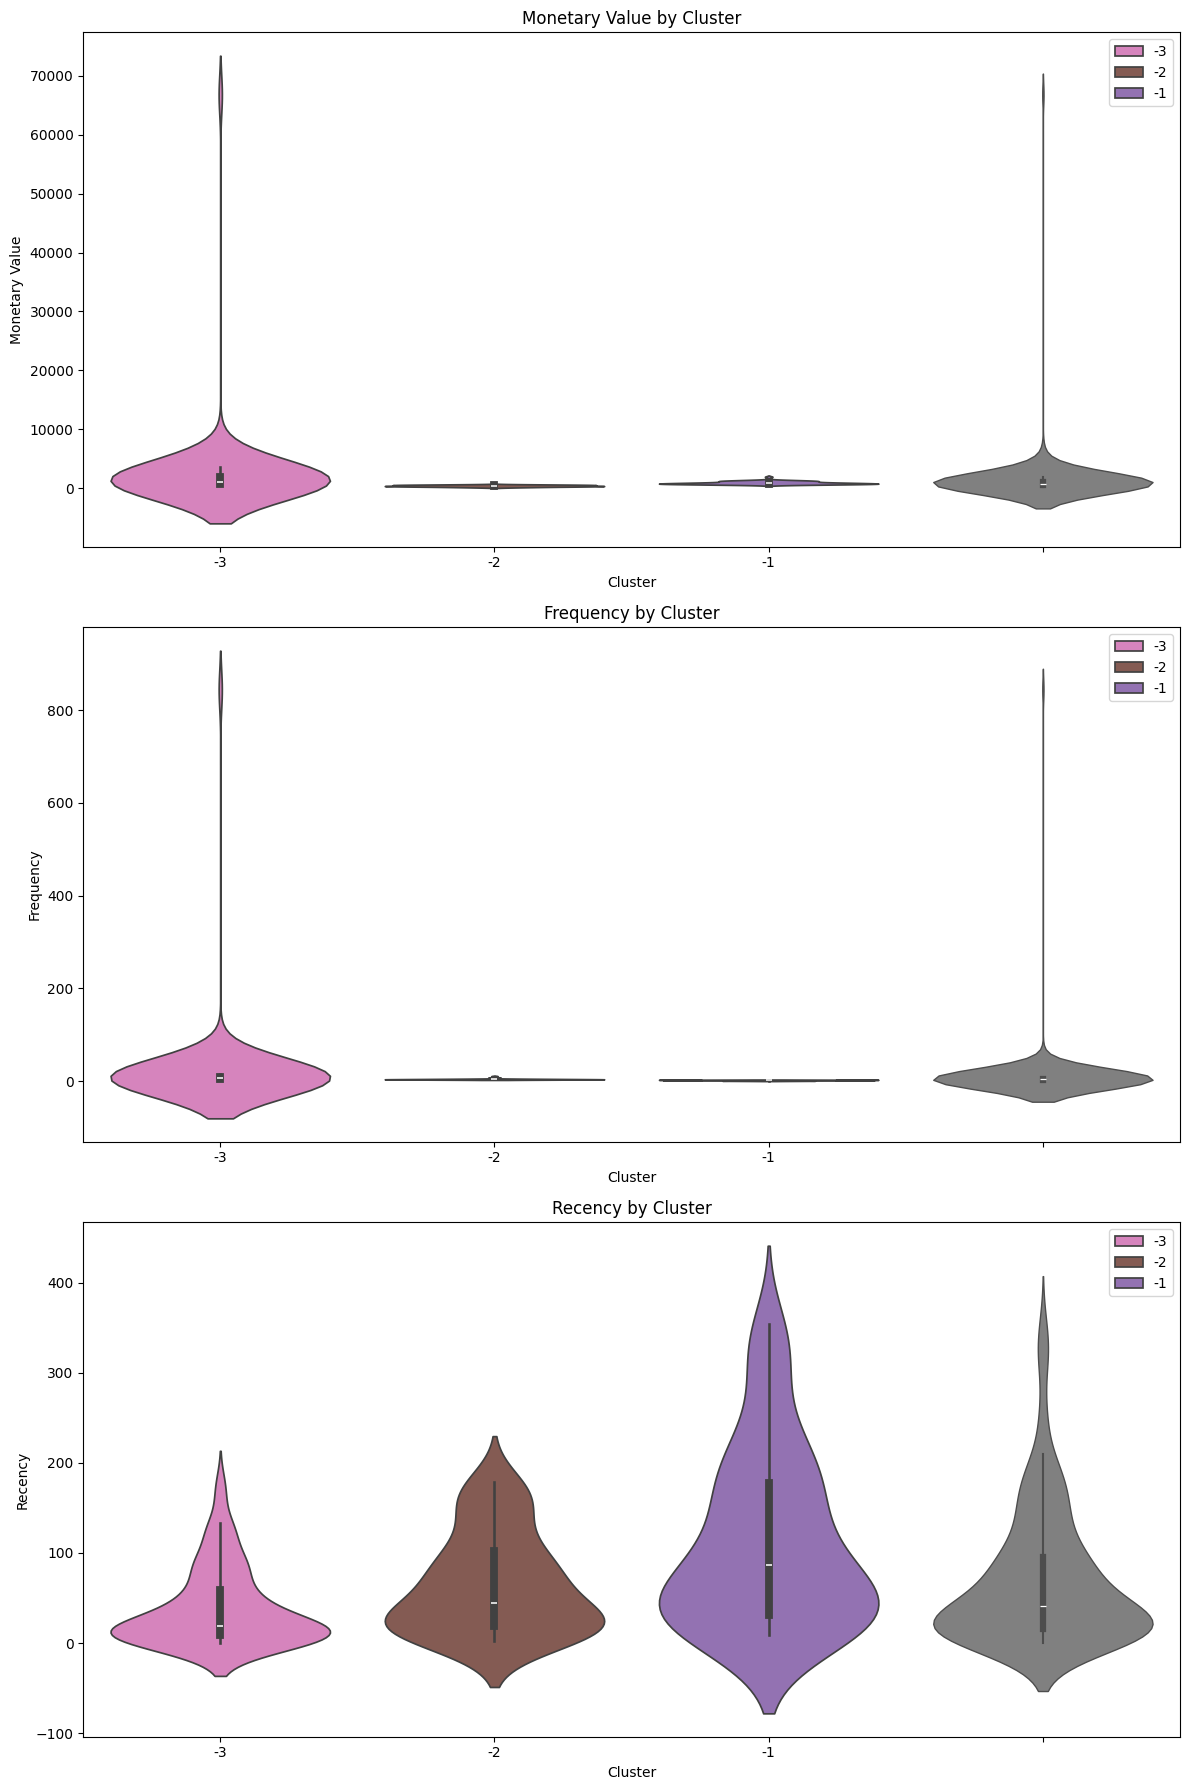

In [57]:
cluster_colors = {-1: '#9467bd',
                  -2: '#8c564b',
                  -3: '#e377c2'}

plt.figure(figsize=(12, 18))

plt.subplot(3, 1, 1)
sns.violinplot(x=outlier_clusters_df['Cluster'], y=outlier_clusters_df['MonetaryValue'], palette=cluster_colors, hue=outlier_clusters_df["Cluster"])
sns.violinplot(y=outlier_clusters_df['MonetaryValue'], color='gray', linewidth=1.0)
plt.title('Monetary Value by Cluster')
plt.ylabel('Monetary Value')

plt.subplot(3, 1, 2)
sns.violinplot(x=outlier_clusters_df['Cluster'], y=outlier_clusters_df['Frequency'], palette=cluster_colors, hue=outlier_clusters_df["Cluster"])
sns.violinplot(y=outlier_clusters_df['Frequency'], color='gray', linewidth=1.0)
plt.title('Frequency by Cluster')
plt.ylabel('Frequency')

plt.subplot(3, 1, 3)
sns.violinplot(x=outlier_clusters_df['Cluster'], y=outlier_clusters_df['Recency'], palette=cluster_colors, hue=outlier_clusters_df["Cluster"])
sns.violinplot(y=outlier_clusters_df['Recency'], color='gray', linewidth=1.0)
plt.title('Recency by Cluster')
plt.ylabel('Recency')

plt.tight_layout()
plt.show()

### Customer Segmentation Outlier Clusters

#### Cluster -1 (Monetary Outliers): "PAMPER"
- **Characteristics**: High spenders but not necessarily frequent buyers. Their purchases are large but infrequent.
- **Potential Strategy**: Focus on maintaining their loyalty with personalized offers or luxury services that cater to their high spending capacity.

---

#### Cluster -2 (Frequency Outliers): "UPSELL"
- **Characteristics**: Frequent buyers who spend less per purchase. These customers are consistently engaged but might benefit from upselling opportunities.
- **Potential Strategy**: Implement loyalty programs or bundle deals to encourage higher spending per visit, given their frequent engagement.

---

#### Cluster -3 (Monetary & Frequency Outliers): "DELIGHT"
- **Characteristics**: The most valuable outliers, with extreme spending and frequent purchases. They are likely your top-tier customers who require special attention.
- **Potential Strategy**: Develop VIP programs or exclusive offers to maintain their loyalty and encourage continued engagement.


In [58]:
cluster_labels = {
    0: "RETAIN",
    1: "RE-ENGAGE",
    2: "NURTURE",
    3: "REWARD",
    -1: "PAMPER",
    -2: "UPSELL",
    -3: "DELIGHT"
}

In [59]:
full_clustering_df = pd.concat([non_outliers_df, outlier_clusters_df])

full_clustering_df

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency,Cluster
1,3092447854651.00,112.95,1,2024-08-31,122,3
3,3092467712059.00,94.00,1,2024-03-14,292,2
4,3092470366267.00,38.38,1,2024-02-24,311,2
5,3092472660027.00,123.00,1,2024-09-20,102,3
6,3092472823867.00,106.00,2,2024-10-15,77,0
...,...,...,...,...,...,...
1190,6688337395771.00,655.50,4,2024-12-15,16,-3
1191,6688340803643.00,1223.00,6,2024-12-17,14,-3
1317,6748084240443.00,703.00,10,2024-12-24,7,-3
1353,6781267542075.00,769.50,6,2024-12-29,2,-3


In [60]:
full_clustering_df["ClusterLabel"] = full_clustering_df["Cluster"].map(cluster_labels)

full_clustering_df

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency,Cluster,ClusterLabel
1,3092447854651.00,112.95,1,2024-08-31,122,3,REWARD
3,3092467712059.00,94.00,1,2024-03-14,292,2,NURTURE
4,3092470366267.00,38.38,1,2024-02-24,311,2,NURTURE
5,3092472660027.00,123.00,1,2024-09-20,102,3,REWARD
6,3092472823867.00,106.00,2,2024-10-15,77,0,RETAIN
...,...,...,...,...,...,...,...
1190,6688337395771.00,655.50,4,2024-12-15,16,-3,DELIGHT
1191,6688340803643.00,1223.00,6,2024-12-17,14,-3,DELIGHT
1317,6748084240443.00,703.00,10,2024-12-24,7,-3,DELIGHT
1353,6781267542075.00,769.50,6,2024-12-29,2,-3,DELIGHT


# Visualisation

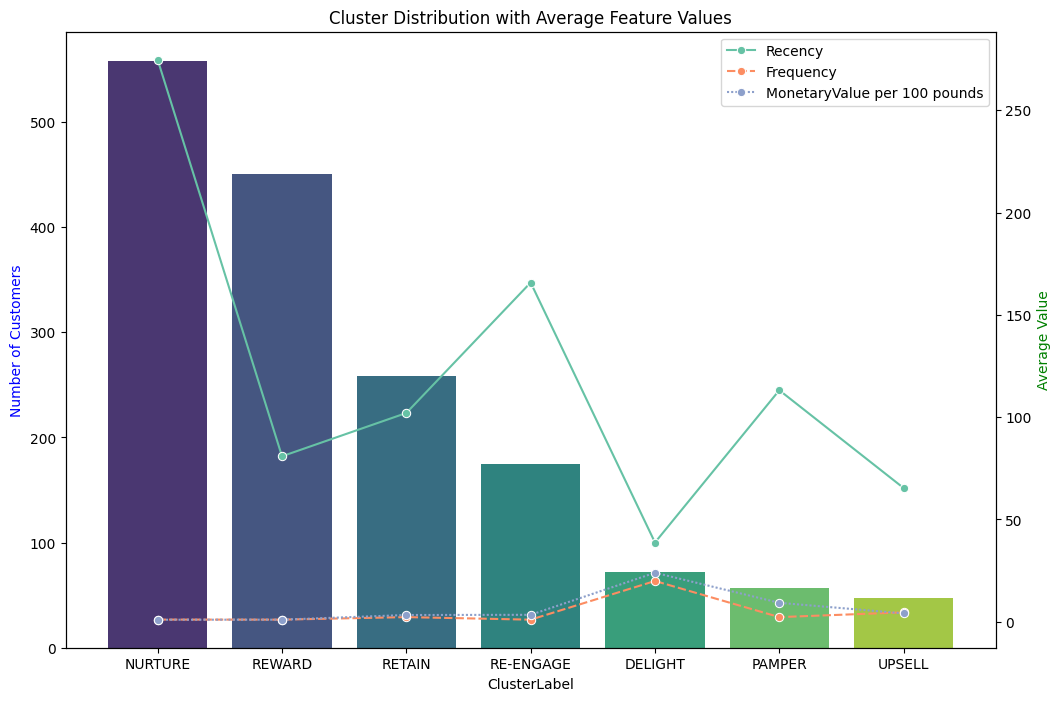

In [61]:
cluster_counts = full_clustering_df['ClusterLabel'].value_counts()
full_clustering_df["MonetaryValue per 100 pounds"] = full_clustering_df["MonetaryValue"] / 100.00
feature_means = full_clustering_df.groupby('ClusterLabel')[['Recency', 'Frequency', 'MonetaryValue per 100 pounds']].mean()

fig, ax1 = plt.subplots(figsize=(12, 8))

sns.barplot(x=cluster_counts.index, y=cluster_counts.values, ax=ax1, palette='viridis', hue=cluster_counts.index)
ax1.set_ylabel('Number of Customers', color='b')
ax1.set_title('Cluster Distribution with Average Feature Values')

ax2 = ax1.twinx()

sns.lineplot(data=feature_means, ax=ax2, palette='Set2', marker='o')
ax2.set_ylabel('Average Value', color='g')

plt.show()